In [0]:
import pandas as pd

In [2]:
!pip3 install biosppy

     |████████████████████████████████| 81kB 2.5MB/s 


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

EEG- 2 CHANNEL
Music-EEG


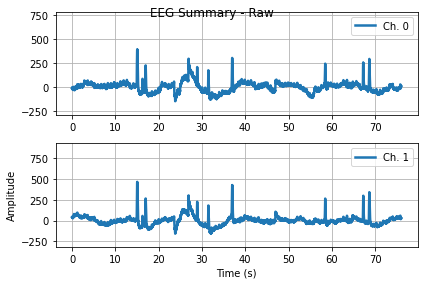

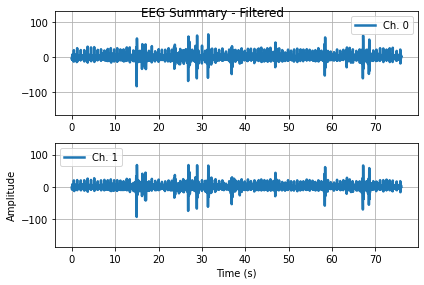

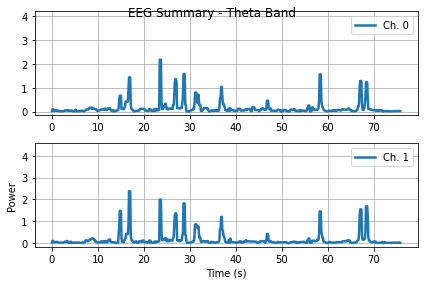

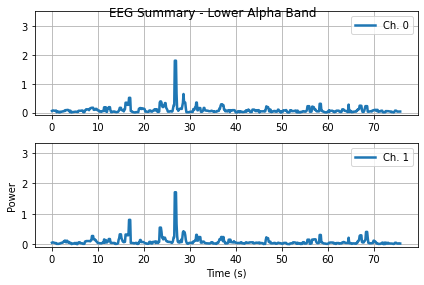

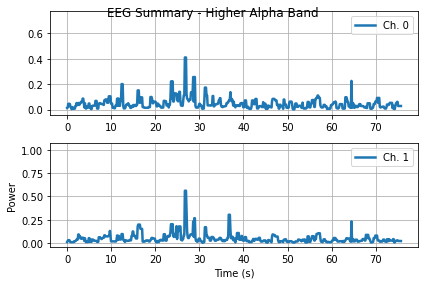

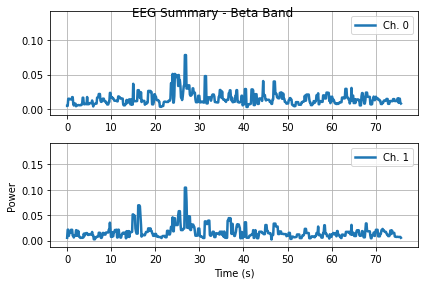

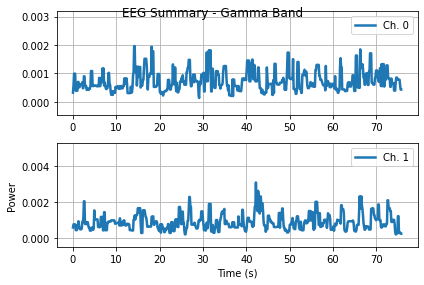

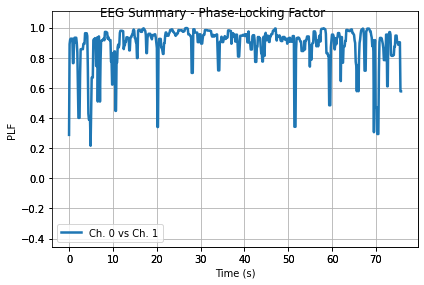

Reading-EEG


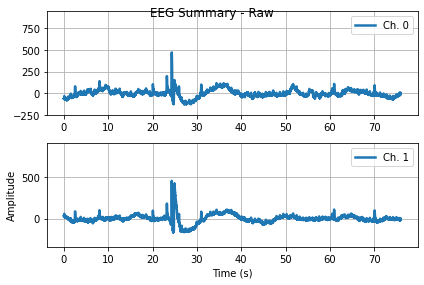

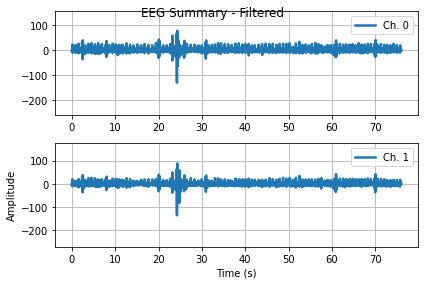

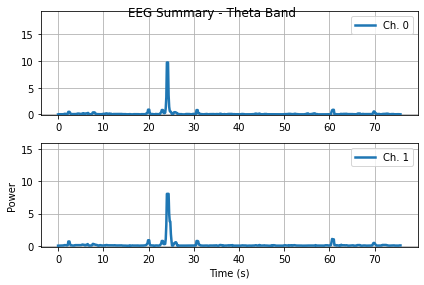

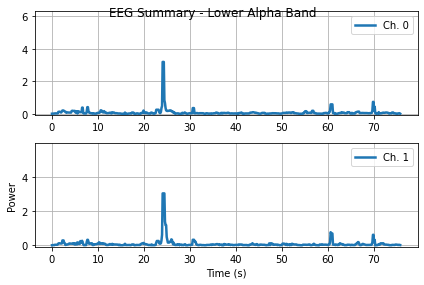

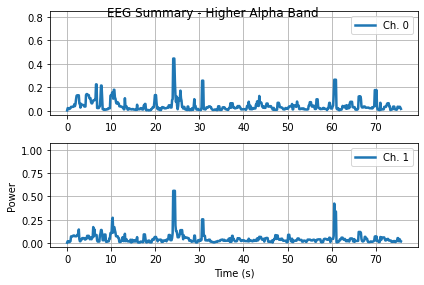

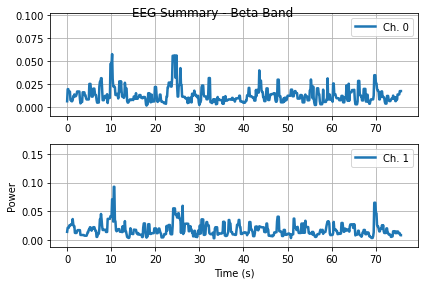

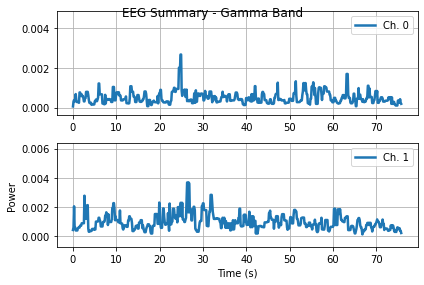

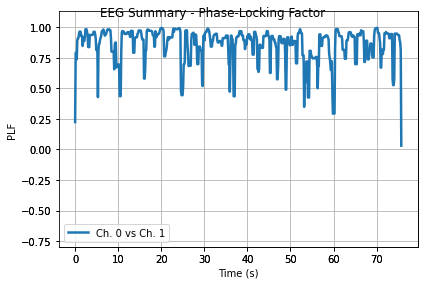

Meditation-EEG


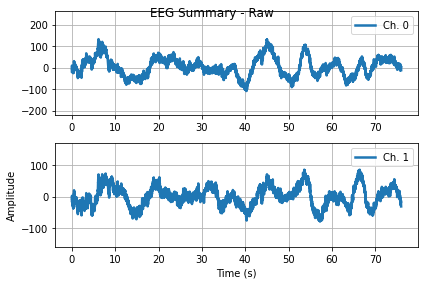

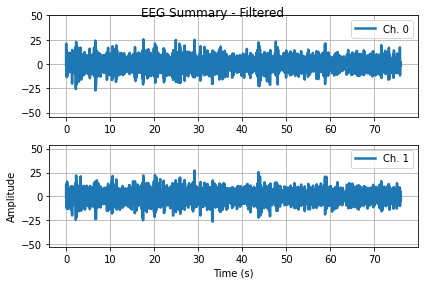

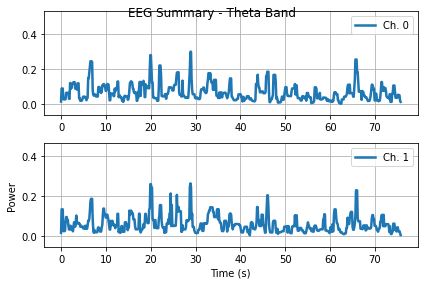

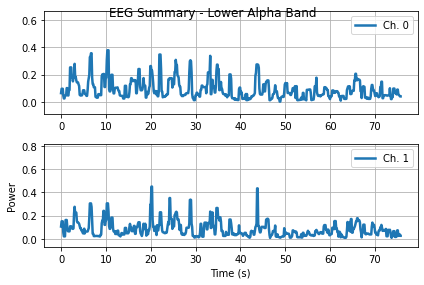

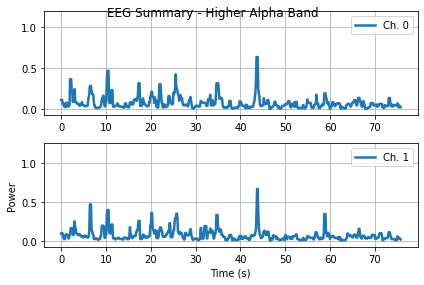

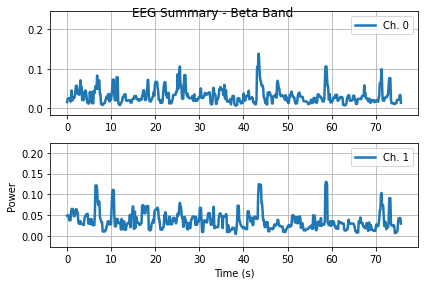

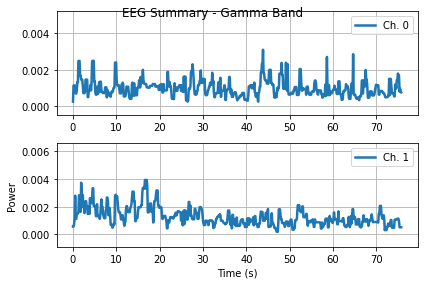

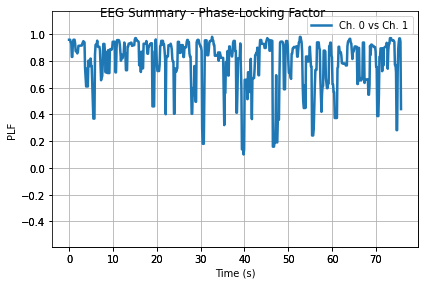

videoWatching-EEG


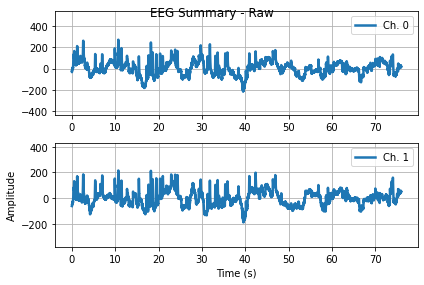

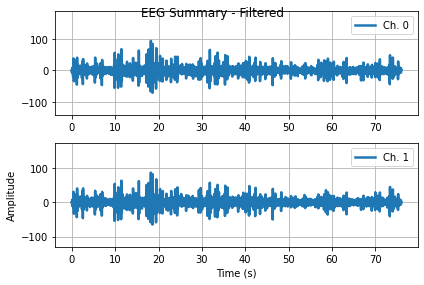

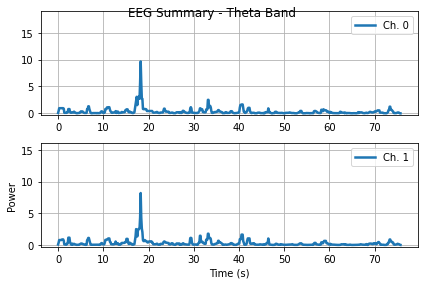

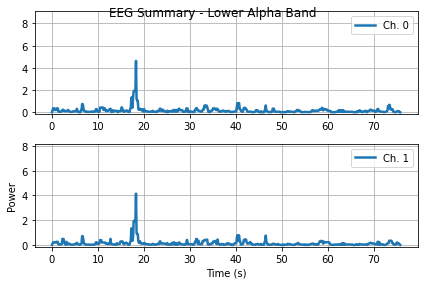

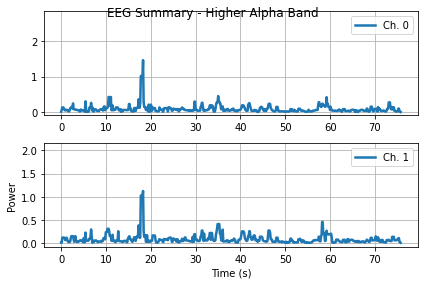

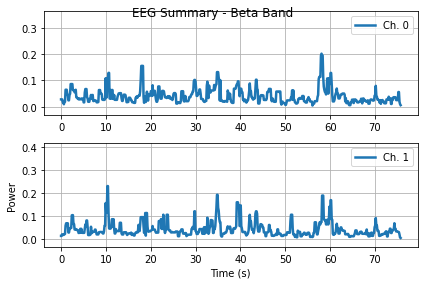

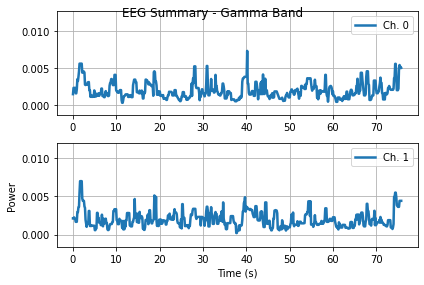

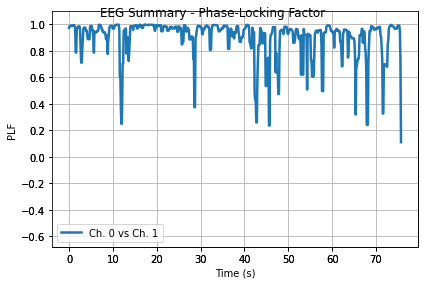

In [43]:
path1 = '/content/drive/My Drive/btp-data/musicDataAllSubjects.csv'
path2 = '/content/drive/My Drive/btp-data/readingDataAllSubjects.csv'
path3 = '/content/drive/My Drive/btp-data/meditationDataAllSubjects.csv'
path4 = '/content/drive/My Drive/btp-data/videoWatchingDataAllSubjects.csv'
from biosppy import signals
print('EEG- 2 CHANNEL')
df1= pd.read_csv(path1)[['fp1','fp2']]
df1=df1[20000:58000]
print('Music-EEG')
out1 = signals.eeg.eeg(df1,500)


df2 = pd.read_csv(path2)[['fp1','fp2']]
df2=df2[20000:58000]
print('Reading-EEG')
out2 = signals.eeg.eeg(df2,500)

df3 = pd.read_csv(path3)[['fp1','fp2']]
df3=df3[20000:58000]
print('Meditation-EEG')
out3 = signals.eeg.eeg(df3,500)

df4 = pd.read_csv(path4)[['fp1','fp2']]
df4=df4[20000:58000]
print('videoWatching-EEG')
out4 = signals.eeg.eeg(df4,500)
#df=df1.append(df2, ignore_index=True)



In [0]:
import biosppy.utils as ut
# outt4 = ut.ReturnTuple(out4)
# outt4[3]

In [45]:
import numpy as np
merge_arr1 = np.concatenate([out1[3],out1[4],out1[5],out1[6],out1[7]], axis=1)
print(merge_arr1.shape) 


merge_arr2 = np.concatenate([out2[3],out2[4],out2[5],out2[6],out2[7]], axis=1)
print(merge_arr2.shape)  

merge_arr3 = np.concatenate([out3[3],out3[4],out3[5],out3[6],out3[7]], axis=1)
print(merge_arr3.shape)  

merge_arr4 = np.concatenate([out4[3],out4[4],out4[5],out4[6],out4[7]], axis=1)
print(merge_arr4.shape)  

dff1 = pd.DataFrame(merge_arr1)
dff1['class']=0
dff2 = pd.DataFrame(merge_arr2)
dff2['class'] =1
dff3 = pd.DataFrame(merge_arr3)
dff3['class'] =2
dff4 = pd.DataFrame(merge_arr4)
dff4['class'] =3

df=dff1.append(dff2, ignore_index=True)
df=df.append(dff3, ignore_index=True)
df=df.append(dff4, ignore_index=True)
df.head()


(602, 10)
(602, 10)
(602, 10)
(602, 10)


,0,1,2,3,4,5,6,7,8,9,class
0,0.027780,0.035719,0.058524,0.052340,0.012916,0.009521,0.004253,0.005491,0.000318,0.000579,0
1,0.103409,0.105969,0.072997,0.061424,0.015723,0.021495,0.004288,0.021492,0.000581,0.000749,0
2,0.103409,0.105969,0.072997,0.061424,0.046111,0.029571,0.014671,0.021492,0.000989,0.000758,0
3,0.063410,0.047481,0.072997,0.052340,0.046111,0.029571,0.014671,0.009084,0.000989,0.000758,0
4,0.027780,0.035719,0.065462,0.049293,0.046111,0.029571,0.014671,0.015279,0.000989,0.000749,0


In [0]:
X = df.drop('class', axis=1)
y = df['class']

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [0]:
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier(random_state = 1,
                                  n_estimators = 300,
                                  max_depth = 300,  min_samples_leaf = 1)
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
from sklearn.utils import shuffle
X_s, y_s = shuffle(X, y)
acc_cv_score = cross_val_score(rfc, X_s, y_s, cv=10, scoring='accuracy')

In [88]:
from sklearn.metrics import accuracy_score
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All Accuracy Scores ===")
print(acc_cv_score)
print('\n')
print("=== Mean Accuracy Score ===")
print("Mean Score - Random Forest: ", acc_cv_score.mean())

# print("=== Model Accuracy ===")
# acc = accuracy_score(y_test,rfc_predict)
# print("Model Accuracy - Random Forest: %.2f"%acc)




=== Confusion Matrix ===
[[160  29  11   5]
 [ 25 152  18   2]
 [ 11   6 168  16]
 [ 13   3  23 153]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.77      0.78      0.77       205
           1       0.80      0.77      0.79       197
           2       0.76      0.84      0.80       201
           3       0.87      0.80      0.83       192

    accuracy                           0.80       795
   macro avg       0.80      0.80      0.80       795
weighted avg       0.80      0.80      0.80       795



=== All Accuracy Scores ===
[0.8340249  0.86307054 0.83817427 0.81327801 0.85892116 0.82157676
 0.82987552 0.87136929 0.83333333 0.8625    ]


=== Mean Accuracy Score ===
Mean Score - Random Forest:  0.8426123789764869
